In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results/N100-F1000-S100-R10-result-v9.csv')
df.describe()

,correlation,load,value,disturbance,actual_load
count,3150.000000,3150.000000,2765.000000,3150.000000,3.150000e+03
mean,0.500000,0.800000,134.402375,0.141384,1.211805e+06
std,0.302813,0.070722,131.210806,0.037653,6.075639e+04
min,0.000000,0.700000,8.083951,0.009631,1.037962e+06
25%,0.250000,0.750000,55.341169,0.123275,1.180789e+06
50%,0.500000,0.800000,98.815299,0.149380,1.205570e+06
75%,0.750000,0.850000,166.762749,0.170879,1.241781e+06
max,1.000000,0.900000,1504.050309,0.188498,1.443041e+06


In [3]:
vals = df.drop(['disturbance', 'actual_load'], axis=1).groupby(['algorithm', 'correlation', 'load']).mean()
vals = vals.unstack(0)
vals.reset_index(inplace=True)
vals.head()

correlation  load      value                      
algorithm                           BF         RR       SALP
0                 0.0  0.70  11.909926  12.356562   8.397245
1                 0.0  0.75  15.330321  16.209826  10.900758
2                 0.0  0.80  20.484721  22.583289  14.814922
3                 0.0  0.85  29.160584  35.864635  21.966563
4                 0.0  0.90  46.996771        NaN  41.004120

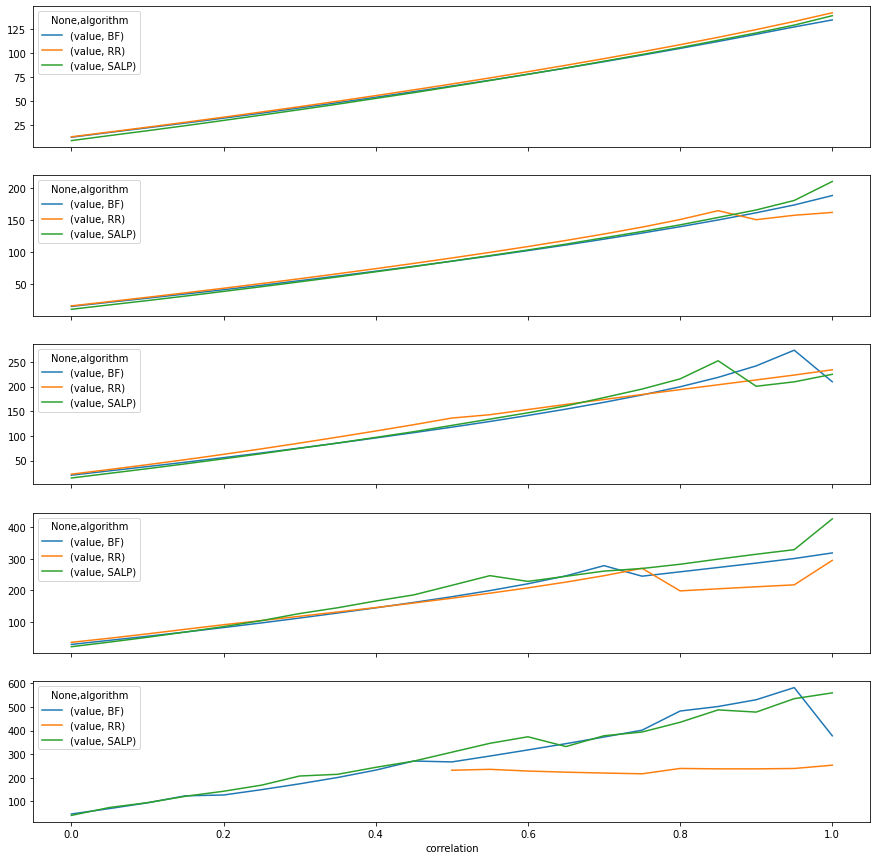

In [4]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

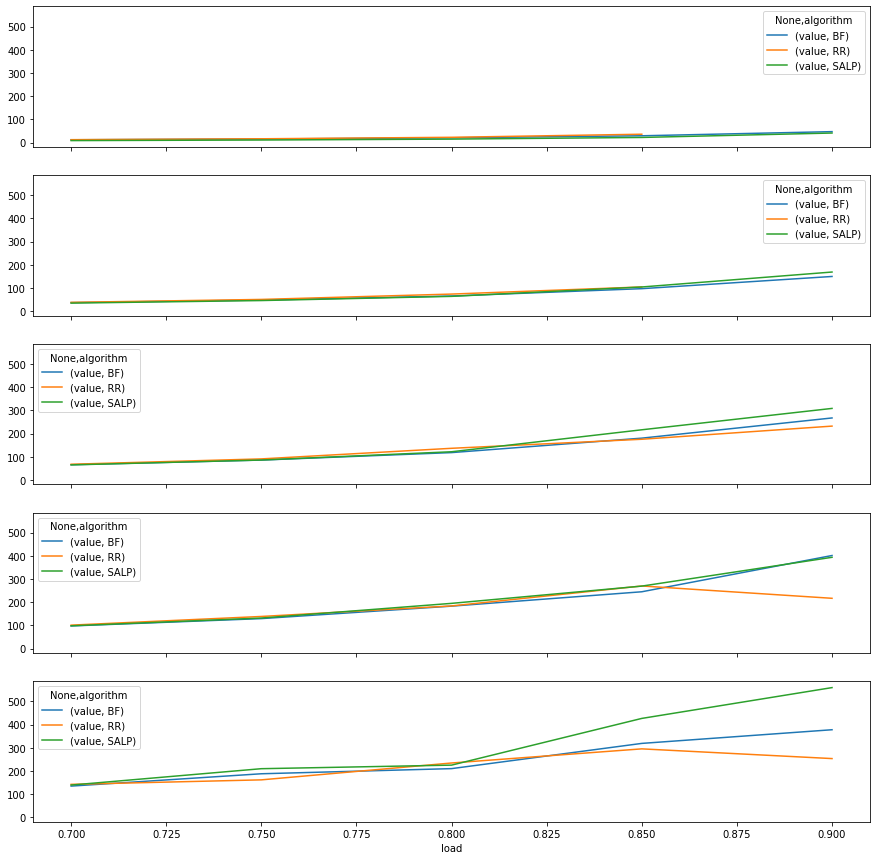

In [5]:
cors = np.array([0,.25,.5,.75,1])
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True, sharey=True)
for i in range(cors.size):
    vals[vals['correlation']==cors[i]].drop('correlation', axis=1).plot(x='load', ax=axes[i], legend=True)
plt.show()

In [6]:
df.groupby(['algorithm', 'load']).count()

correlation  value  disturbance  actual_load
algorithm load                                              
BF        0.70          210    210          210          210
          0.75          210    210          210          210
          0.80          210    209          210          210
          0.85          210    204          210          210
          0.90          210    185          210          210
RR        0.70          210    210          210          210
          0.75          210    207          210          210
          0.80          210    200          210          210
          0.85          210    122          210          210
          0.90          210     26          210          210
SALP      0.70          210    210          210          210
          0.75          210    210          210          210
          0.80          210    207          210          210
          0.85          210    201          210          210
          0.90          210    154          210          210

In [7]:
dist = df.drop(['value', 'actual_load'], axis=1).groupby(['algorithm', 'correlation', 'load']).mean()
dist = dist.unstack(0)
dist.reset_index(inplace=True)
dist.head()

correlation  load disturbance                    
algorithm                            BF        RR      SALP
0                 0.0  0.70    0.177933  0.185701  0.155961
1                 0.0  0.75    0.177933  0.185701  0.155961
2                 0.0  0.80    0.177933  0.185701  0.155961
3                 0.0  0.85    0.177933  0.185701  0.155961
4                 0.0  0.90    0.177933  0.185701  0.155961

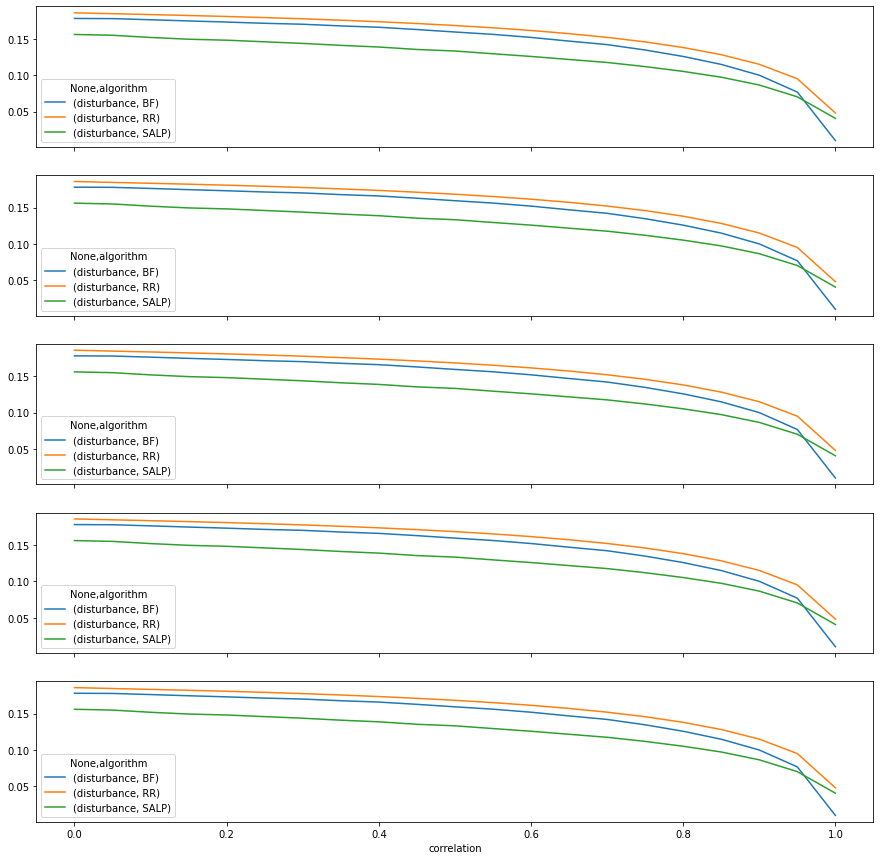

In [8]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    dist[dist['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

In [9]:
acld = df.drop(['algorithm', 'value', 'disturbance'], axis=1).groupby(['correlation', 'load']).mean()
# acld = acld.unstack(0)
acld.reset_index(inplace=True)
acld.head()

,correlation,load,actual_load
0,0.0,0.70,1.200573e+06
1,0.0,0.75,1.200573e+06
2,0.0,0.80,1.200573e+06
3,0.0,0.85,1.200573e+06
4,0.0,0.90,1.200573e+06


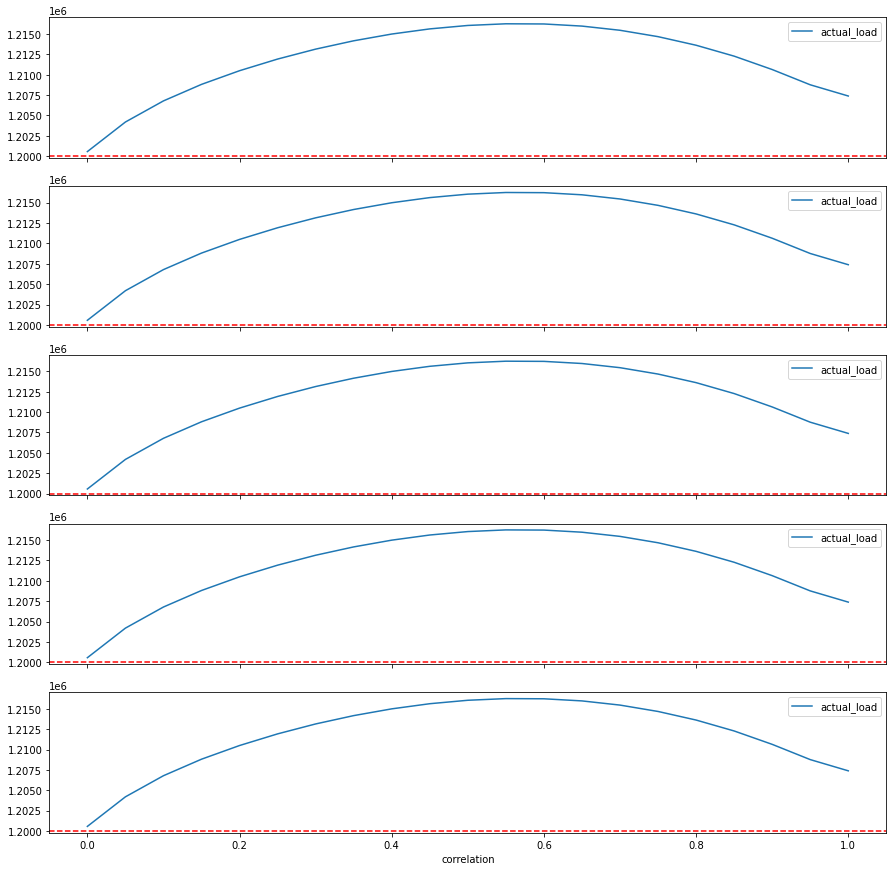

In [10]:
est = 1.2 * 10**6
loads = acld['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
    axes[i].axhline(est,color='red',ls='--')
plt.show()

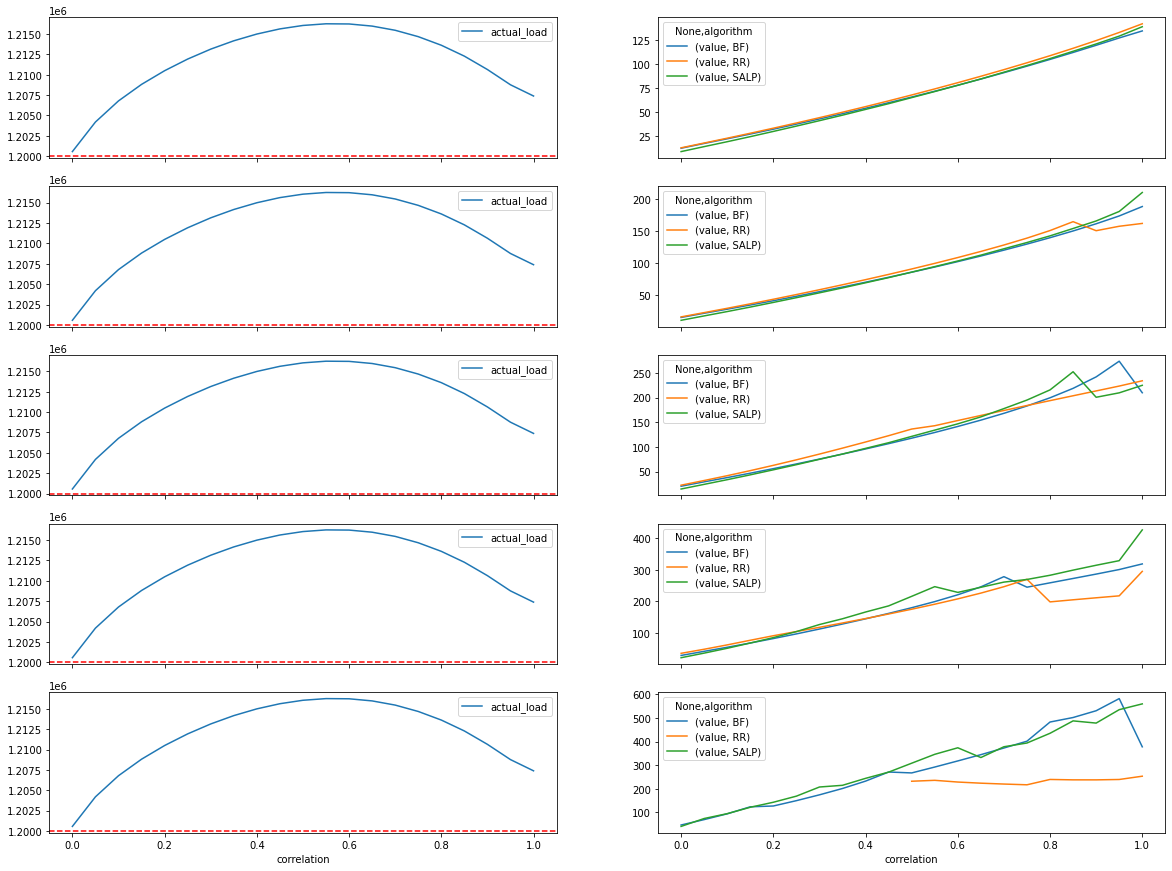

In [11]:
loads = acld['load'].unique()
fig, axes = plt.subplots(loads.size, 2, figsize=(20,15), sharex=True)
for i in range(loads.size):
    acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][0], legend=True)
    axes[i][0].axhline(est,color='red',ls='--', label="estimated")
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][1], legend=True)

plt.show()